<a href="https://colab.research.google.com/github/Maagnitude/california-housing-xai/blob/main/california-housing-xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βιβλιοθήκες**
Κάνουμε **import** τα απαραίτητα **modules**:

* Το **matplotlib.pyplot** για τη δημιουργία διαγραμμάτων.
* Το **numpy** για την υποστήριξη μαθηματικών πράξεων και σχέσεων.
* Το **datasets** για να εισάγουμε το **dataset** πάνω στο οποίο θέλουμε να εκπαιδεύσουμε το μοντέλο μας, και το **linear_model** για να χρησιμοποιήσουμε ένα γραμμικό μοντέλο (συγκεκριμένα της **γραμμικής παλινδρόμισης**)
* Από το **datasets** εισάγουμε το **fetch_california_housing**, ώστε να πάρουμε το εν λόγω **dataset**.
* Από τα **metrics** εισάγουμε:
  * το **mean_squared_error**, για να υπολογίσουμε το **μέσο τετραγωνικό σφάλμα** της πρόβλεψης του μοντέλου μας, και
  * το **r2_score** για να υπολογίσουμε την μετρική **R2-squared** του μοντέλου μας.


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
# Load dataset (X:inputs/features, Y:target)
ds_X, ds_Y = fetch_california_housing(return_X_y=True)

In [3]:
# Split features into training/test sets
ds_X_train = ds_X[:-4000]
ds_X_test = ds_X[-4000:]

In [24]:
# Split targets into training/test sets
ds_Y_train = ds_Y[:-4000]
ds_Y_test = ds_Y[-4000:]

In [25]:
# Initialize linear regression object
regr = linear_model.LinearRegression()

In [26]:
# Construct model using the training sets
regr.fit(ds_X_train, ds_Y_train)

LinearRegression()

In [27]:
# Produce predictions using the test set
ds_Y_pred = regr.predict(ds_X_test)

Παίρνουμε τα **βάρη/συντελεστές** (**coefficients/β1-β8**), την **παρεμβολή** (**intercept/β0**) καθώς και το **σφάλμα πρόβλεψης** (**prediction_error/ε**) και παρατηρούμε ότι η πρόβλεψη **y** κάθε δείγματος θα υπολογίζεται από την σχέση:

**y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8 + ε**

η οποία αντικαθιστώντας τις τιμές γίνεται:

**y = -36.308638344599295 + 4.47711234e-01 x X1 + 9.40915756e-03 x X2 - 1.20802393e-01 x X3 + 7.09551707e-01 x X4 - 1.82577993e-06 x X5 - 8.83342492e-03 x X6 - 4.21683195e-01 x X7 - 4.29077083e-01 x X8 + 0.50**

Οπότε τα χαρακτηριστικά **X1** και **X4** τα οποία πολλαπλασιάζονται με τα βάρη **β1** και **β4** αντίστοιχα, έχουν **μεγάλη θετική συσχέτιση** με την **τιμή αγοράς κατοικίας** και τα **X7**, **Χ8** (με **β7** και **β8**) έχουν **μεγάλη αρνητική συσχέτιση** μ' αυτήν.

In [29]:
# Output learned model coefficients
intercept = regr.intercept_
coefficients = regr.coef_
print("Intercept: \n", intercept,"\n")
print("Coefficients: \n", coefficients)

Intercept: 
 -36.308638344599295 

Coefficients: 
 [ 4.47711234e-01  9.40915756e-03 -1.20802393e-01  7.09551707e-01
 -1.82577993e-06 -8.83342492e-03 -4.21683195e-01 -4.29077083e-01]


In [19]:
# Output mean squared prediction error
prediction_error = mean_squared_error(ds_Y_test, ds_Y_pred)
print("Mean square prediction error: %.2f" % prediction_error)

Mean square prediction error: 0.50


In [47]:
cal_housing=fetch_california_housing()
feature_names=cal_housing.feature_names
target = cal_housing.target
data = cal_housing.data

In [21]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Plot target with each feature separately
Feature 0 (MedInc)


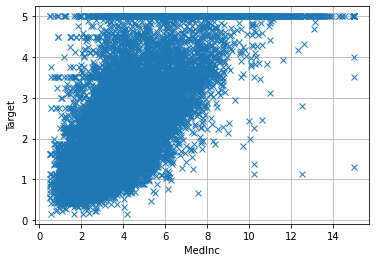

Feature 1 (HouseAge)


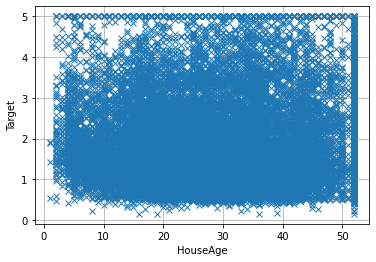

Feature 2 (AveRooms)


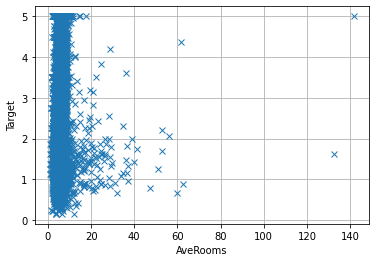

Feature 3 (AveBedrms)


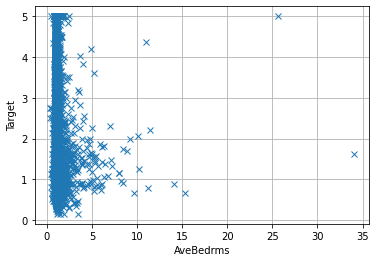

Feature 4 (Population)


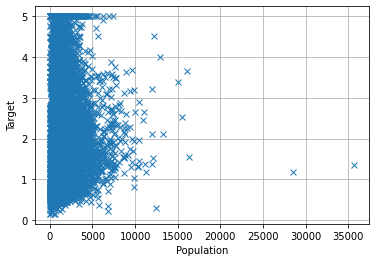

Feature 5 (AveOccup)


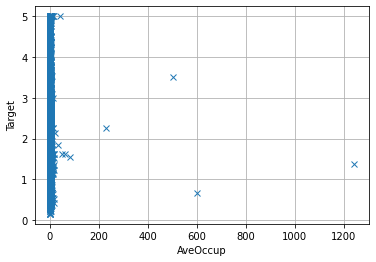

Feature 6 (Latitude)


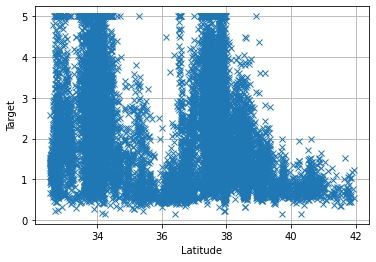

Feature 7 (Longitude)


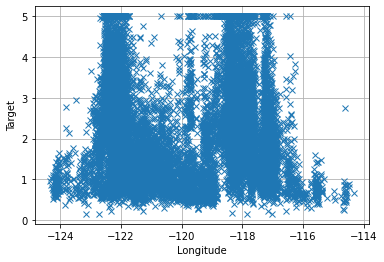

In [46]:
print("Plot target with each feature separately")
for i in range(ds_X_train.data.shape[1]):
    print("Feature %d (%s)" % (i, feature_names[i]))
    plt.plot(data[:, i], target[:], 'x')
    plt.xlabel(feature_names[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()

# **Μετρική R-squared**
Η μετρική R-squared είναι ένα μέτρο του πόσο καλά το μοντέλο εξηγεί τη διακύμανση των δεδομένων. Κυμαίνεται από 0 έως 1, με τιμή 1 που υποδηλώνει τέλεια προσαρμογή. Μια υψηλή τιμή R-squared δείχνει ότι το μοντέλο είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων, ενώ μια χαμηλή τιμή R-squared δείχνει ότι το μοντέλο δεν είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων.

Γενικά, η συνολική ικανότητα του μοντέλου να εξηγεί τα δεδομένα μπορεί να αξιολογηθεί εξετάζοντας την τιμή R-τετράγωνο σε συνδυασμό με το μέσο τετραγωνικό σφάλμα πρόβλεψης (MSE). Ένα χαμηλό MSE και μια υψηλή τιμή τετραγώνου R θα υποδείκνυε καλή προσαρμογή του μοντέλου, ενώ ένα υψηλό MSE και μια χαμηλή τιμή τετραγώνου R θα υποδείκνυε κακή προσαρμογή του μοντέλου.

Η τιμή (**0.6616**) είναι αρκετά πιο κοντά στο 1, που σημαίνει ότι το μοντέλο εξηγεί αρκετά μεγάλο μέρος του συνόλου της διακύμανσης στα δεδομένα.

Συνεπώς σε συνδυασμό με το μέσο τετραγωνικό σφάλμα που έχει τιμή 0.50 η οποία είναι δεν είναι ούτε μεγάλη ούτε μικρή, θεωρούμε ότι **έχει νόημα** να εξηγηθεί η συμπεριφορά του μοντέλου αυτού.

In [10]:
r2 = r2_score(ds_Y_test, ds_Y_pred)
print("R-squared:", r2)

R-squared: 0.6616437502497786


# **Οπτικοποίηση**
Παρακάτω οπτικοποιούμε τα βάρη/συντελεστές, ώστε να τα μελετήσουμε.

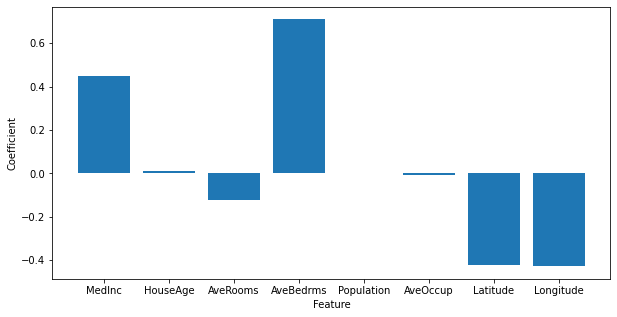

In [16]:
plt.figure(figsize=(10,5))
plt.bar(feature_names, coefficients)

plt.xlabel('Feature')
plt.ylabel('Coefficient')

plt.show()

## Μετατρέπουμε το **dataset** σε **pandas dataframe** για να διερευνήσουμε περαιτέρω τα δεδομένα μας.

In [63]:
ds_all = np.column_stack((ds_X, ds_Y))

In [68]:
feature_names.append('price')

In [108]:
df = pd.DataFrame(ds_all, columns=feature_names)

In [ ]:
plt.figure(figsize=(25,15))

# for i, column in enumerate(df.columns):
#   plt.subplot(4, 6, i + 1)
#   sns.boxplot(data=df[column])
#   plt.title(column)

plt.boxplot(df)

plt.xlabel('Feature')
plt.ylabel('Value')

plt.xticks(range(1, df.shape[1] + 1), df.columns, rotation=90)

# plt.tight_layout()
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


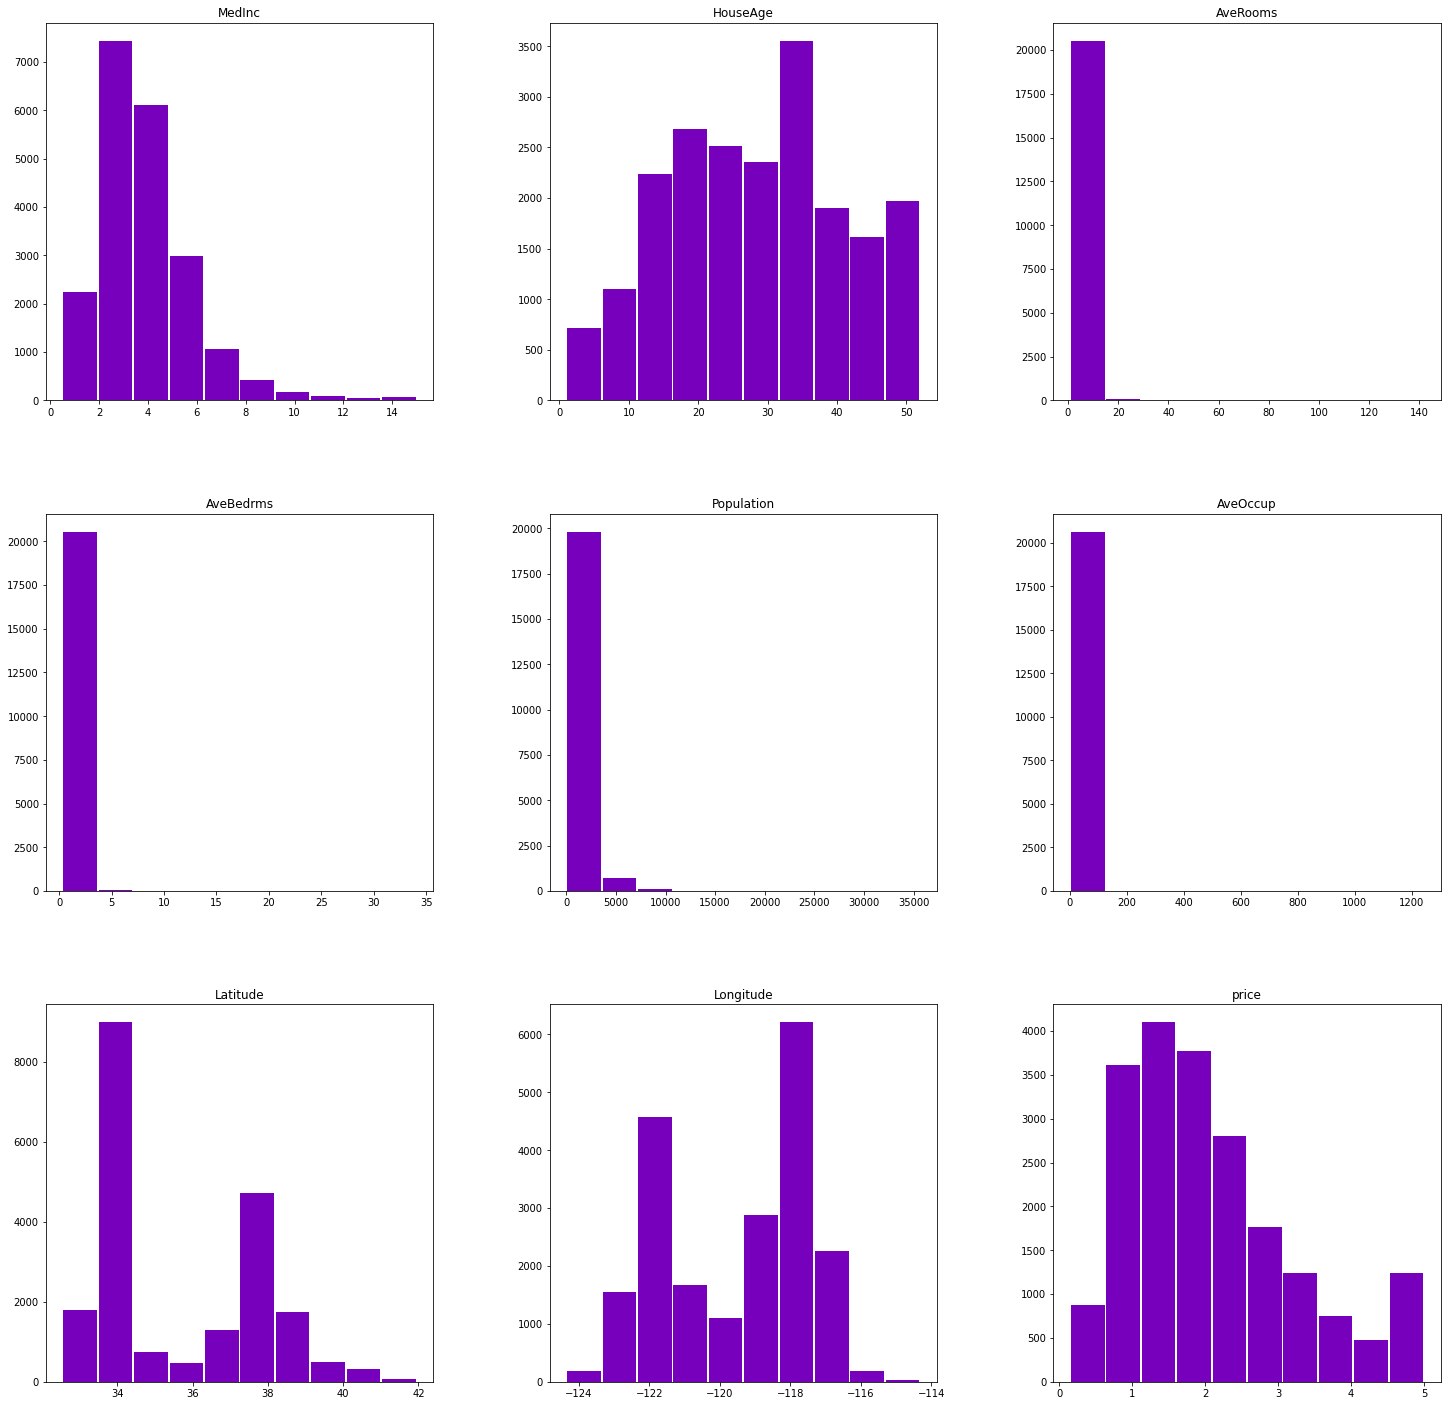

In [76]:
df_histplot = df.hist(grid=False, figsize=(25, 25), color='#7600BC', zorder=2, rwidth=0.95)

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [78]:
corr_df = df.corr()
corr_df['price']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
price         1.000000
Name: price, dtype: float64